In [163]:
from ccdproc import ImageFileCollection
import matplotlib.pyplot as plt
import numpy as np

In [164]:
data_directory = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-05-21'

In [165]:
im_collection = ImageFileCollection(data_directory)

In [166]:
im_collection.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,swowner
str23,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str21,str1,str5,float64,float64,float64,str34,str32,str8,str9,float64,float64,str11,str1,str9,str1,str1,str1,str10
calibration-0001r5.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:44:51,5.0,5.0,-20.0,-20.789455500000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4061458334,2458260.4032993335,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r55.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:06:01,55.0,55.0,-20.0,-19.99107,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4208449074,2458260.418289032,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r60.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:07:16,60.0,60.0,-20.0,-20.016216,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.421712963,2458260.419186099,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r65.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:08:36,65.0,65.0,-20.0,-20.01935925,9.0,9.0,1,1,0,0,Monochrome (Preflash),r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.422638889,2458260.4201410413,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r70.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:10:21,70.0,70.0,-20.0,-20.016216,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4238541666,2458260.42138536,calibration,,AspenCG16,,,,Matt Craig
calibration-0001r75.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T22:12:33,75.0,75.0,-20.0,-19.972210500000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4253819445,2458260.4229422053,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r10.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:46:24,10.0,10.0,-20.0,-20.3745465,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.407222222,2458260.404404751,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r15.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:46:54,15.0,15.0,-20.0,-20.30853825,9.0,9.0,1,1,0,0,Monochrome (Preflash),r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4075694443,2458260.4047809406,calibration,,AspenCG16,,,,Matt Craig
calibration-0002r20.fit,True,16,2,4109,4096,1.0,32768.0,2018-05-21T21:47:49,20.0,20.0,-20.0,-19.890486000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458260.4082060186,2458260.405446506,calibration,,AspenCG16,,,,Matt Craig


In [167]:
for a_Light in im_collection.hdus(imagetyp='LIGHT'):
    print(a_Light.header['EXPOSURE'])

5.0
55.0
60.0
65.0
70.0
75.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
5.0
50.0


In [168]:
for a_flat, fname in im_collection.hdus(imagetyp='LIGHT', return_fname=True):
    print(f'In file {fname} the exposure is:', a_flat.header['EXPOSURE'], 'with standard deviation ', a_flat.data.std())

In file calibration-0001r5.fit the exposure is: 5.0 with standard deviation  326.2851504248945
In file calibration-0001r55.fit the exposure is: 55.0 with standard deviation  3498.2224764667476
In file calibration-0001r60.fit the exposure is: 60.0 with standard deviation  3837.2899757880846
In file calibration-0001r65.fit the exposure is: 65.0 with standard deviation  4128.301062144946
In file calibration-0001r70.fit the exposure is: 70.0 with standard deviation  4183.819651525861
In file calibration-0001r75.fit the exposure is: 75.0 with standard deviation  3444.3517301372854
In file calibration-0002r10.fit the exposure is: 10.0 with standard deviation  656.1859261530946
In file calibration-0002r15.fit the exposure is: 15.0 with standard deviation  989.748399244404
In file calibration-0002r20.fit the exposure is: 20.0 with standard deviation  1333.3340539673814
In file calibration-0002r25.fit the exposure is: 25.0 with standard deviation  1669.16958826983
In file calibration-0002r30.fi

In [169]:
exposures = []
means = []

for a_light in im_collection.hdus(imagetyp='LIGHT'):
    exposure = a_light.header['EXPOSURE']
    mean = np.mean(a_light.data)
    
    exposures.append(exposure)
    means.append(mean)
    
exposures = np.array(exposures)
means = np.array(means)



In [170]:
print('Exposure times:    ', exposures)
print()
print('ADU:    ', means)

Exposure times:     [ 5. 55. 60. 65. 70. 75. 10. 15. 20. 25. 30. 35. 40. 45.  5. 50.]

ADU:     [ 5513.01118531 50327.47315986 55355.95646133 59719.13804313
 63797.19379769 65088.86051288 10110.85997409 14749.08938595
 19572.68244351 24272.05901459 28960.80263741 33166.45424998
 37488.81943213 42730.70262864  5555.23209111 47650.33556478]


Text(0,0.5,'ADU')

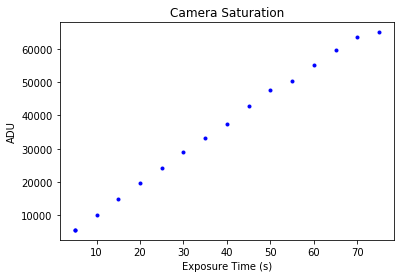

In [171]:
plt.plot(exposures, means, 'b.')
plt.title('Camera Saturation')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')

In [172]:
good_exposure = (exposures <= 40)

In [173]:
linear_fit = np.polyfit(exposures[good_exposure], means[good_exposure], 1)
linear_fit

array([ 920.95205043, 1001.43123159])

In [174]:
def f(x):
    return linear_fit[0] * x + linear_fit[1]

In [175]:
y_fit = f(exposures)

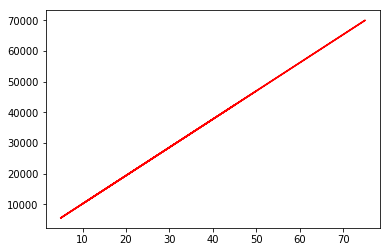

In [176]:
plt.plot(exposures, y_fit, 'r-')

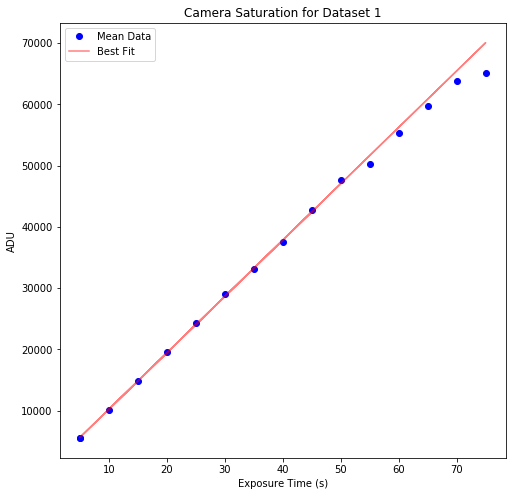

In [177]:
plt.figure(num=0, figsize=(8, 8))
plt.plot(exposures, means, 'bo', label='Mean Data')
plt.plot(exposures, y_fit, 'r-', alpha=.5, label='Best Fit')
plt.title('Camera Saturation for Dataset 1')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.legend()
plt.savefig('Linear Fit for Dataset 1')

In [178]:
y_diff = (y_fit - means) / means * 100

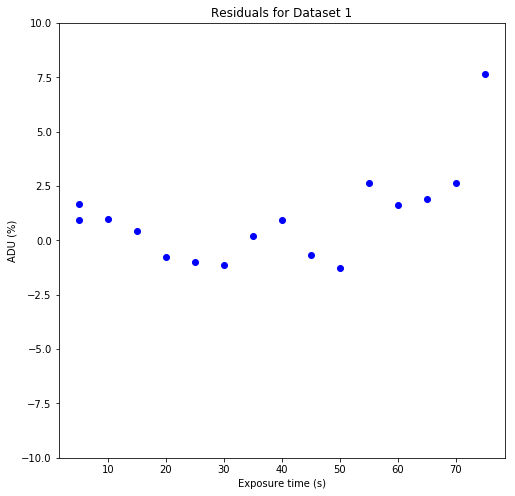

In [179]:
plt.figure(num=1, figsize=(8, 8))
plt.plot(exposures, y_diff, 'bo')
plt.title('Residuals for Dataset 1')
plt.ylim(-10, 10)
plt.xlabel('Exposure time (s)')
plt.ylabel('ADU (%)')
plt.savefig('Residuals (Exposure) for Dataset 1')

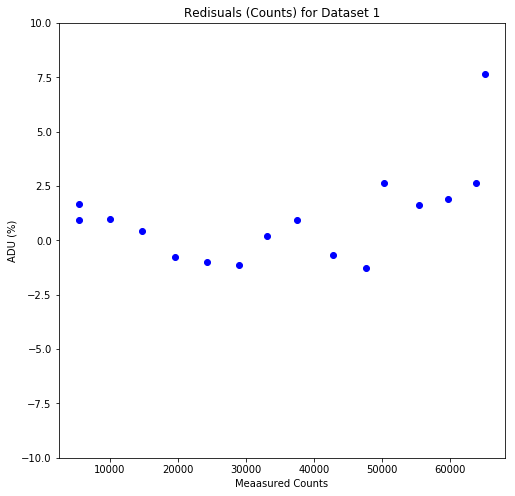

In [180]:
plt.figure(figsize=(8, 8))
plt.plot(means, y_diff, 'bo')
plt.ylim(-10, 10)
plt.title('Redisuals (Counts) for Dataset 1')
plt.xlabel('Meaasured Counts')
plt.ylabel('ADU (%)')
plt.savefig('Residuals (Counts) for Dataset 1')

In [181]:
plt.plot?

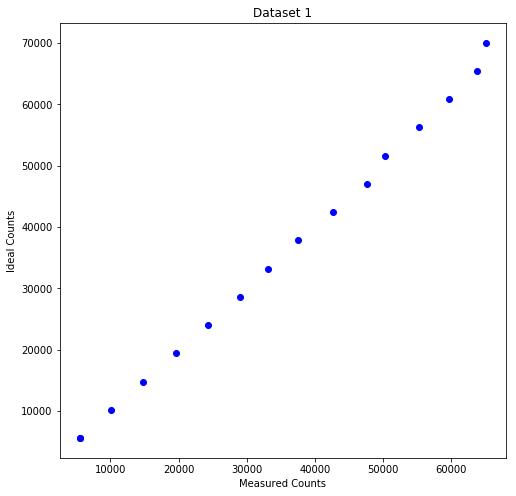

In [182]:
plt.figure(num=2, figsize=(8, 8))
plt.plot(means, y_fit, 'bo')
plt.title('Dataset 1')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.savefig('Ideal Counts vs Measured Counts Dataset 1')

In [183]:
a_light.data.shape

(4096, 4109)

In [184]:
# Dataset 2
data_directory_2 = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-05-24'
im_collection_2 = ImageFileCollection(data_directory_2)
im_collection_2.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,cstretch,cblack,cwhite,pedestal,swowner,jd-obs,hjd-obs,bjd-obs,objctaz,azimuth,objctalt,altitude,objctha,ha,readmode,date,time-obs,ut,timesys,radecsys,airmass,st,lat-obs,long-obs,alt-obs,observat,ra,objctra,dec,objctdec,history
str33,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,str1,str5,float64,float64,float64,str34,str32,str8,str9,float64,float64,str4,str39,str9,str20,str1,str1,str6,int32,int32,int32,str10,float64,float64,float64,float64,float64,float64,float64,str11,str11,str10,str8,str8,str8,str3,str3,float64,str11,float64,float64,float64,str25,str11,str11,str11,str11,str59
DOME-S001-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:51:35,1.0,1.0,-20.0,-20.066508000000002,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.410821759,2458263.408210818,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,1929,1999,0,Matt Craig,2458263.4108218,2458263.4065855,2458263.4073893,268.1444,268.1444,85.2288,85.2288,00 27 44.85,00 27 44.85,Monochrome,24/05/18,21:51:35,21:51:35,UTC,FK5,1.0032457896,07 27 32.91,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:51:59
DOME-S001-R001-C001-r_dupe-1.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:52:08,3.0,3.0,-20.0,-20.053935000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.411203704,2458263.4086043714,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,3760,3909,0,Matt Craig,2458263.4112037,2458263.4069674,2458263.4077712,268.2799,268.2799,85.1346,85.1346,00 28 17.94,00 28 17.94,Monochrome,24/05/18,21:52:08,21:52:08,UTC,FK5,1.00336382604,07 28 06.00,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:52:34
DOME-S001-R001-C001-r_dupe-10.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:58:41,21.0,21.0,-20.0,-20.000499750000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.415752315,2458263.413257555,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,20745,21593,0,Matt Craig,2458263.4157523,2458263.4115157,2458263.4123196,269.6878,269.6878,84.0121,84.0121,00 34 52.02,00 34 52.02,Monochrome,24/05/18,21:58:41,21:58:41,UTC,FK5,1.00344276875,07 34 40.08,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T21:59:25
DOME-S001-R001-C001-r_dupe-11.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-24T21:59:35,23.0,23.0,-20.0,-19.978497,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,46 52 00,-96 27 12,2458263.416377315,2458263.4138941844,DOME,ACP->TCSGalilHybrid.DFM.ASCOM.Telescope,AspenCG16,Observatory Operator,,,Medium,22487,23407,0,Matt Craig,2458263.4163773,2458263.4121407,2458263.4129446,269.8582,269.8582,83.8579,83.8579,00 35 46.16,00 35 46.16,Monochrome,24/05/18,21:59:35,21:59:35,UTC,FK5,1.00345089161,07 35 34.22,46.8667833333,-98.453275,311.0,Paul P. Feder Observatory,06 59 48.06,06 59 48.06,+46 30 06.4,+46 30 06.4,File was processed by PinPoint 6.1.3 at 2018-05-24T22:00:20
DOME-

In [185]:
for image in im_collection_2.hdus(imagetyp="LIGHT"):
    print(image.header['EXPOSURE'])

1.0
3.0
21.0
23.0
25.0
27.0
29.0
31.0
33.0
35.0
37.0
39.0
5.0
41.0
43.0
45.0
47.0
49.0
51.0
53.0
55.0
57.0
59.0
7.0
61.0
63.0
65.0
67.0
69.0
71.0
73.0
75.0
77.0
79.0
9.0
11.0
13.0
15.0
17.0
19.0


In [186]:
exposures_2 = []
means_2 = []

for image in im_collection_2.hdus(imagetyp='LIGHT'):
    exposures_2.append(image.header['EXPOSURE'])
    means_2.append(np.mean(image.data))

exposures_2 = np.array(exposures_2)
means_2 = np.array(means_2)

In [187]:
print('Exposure times:    ', exposures_2)
print()
print('ADU:    ', means_2)

Exposure times:     [ 1.  3. 21. 23. 25. 27. 29. 31. 33. 35. 37. 39.  5. 41. 43. 45. 47. 49.
 51. 53. 55. 57. 59.  7. 61. 63. 65. 67. 69. 71. 73. 75. 77. 79.  9. 11.
 13. 15. 17. 19.]

ADU:     [ 1910.04525651  3704.4906311  20339.30901679 22045.35648744
 23833.30533377 25917.90283649 27783.40530974 29704.47574036
 31879.92303397 33728.32700738 35879.8745996  37916.61207243
  5562.36176222 39817.26070975 41450.71195126 42856.31857476
 44969.27183612 46530.68039164 48228.07952056 50214.302868
 51802.24184003 53504.74021607 55876.20084705  7450.88767369
 57731.69908209 59368.22757548 60970.68565626 62891.88798098
 64088.0203282  64488.9191765  64801.9804189  65014.1192061
 65145.22179549 65232.45954883  9322.6546097  11258.16452939
 13135.93976987 14873.71924095 16870.31622978 18607.65060399]


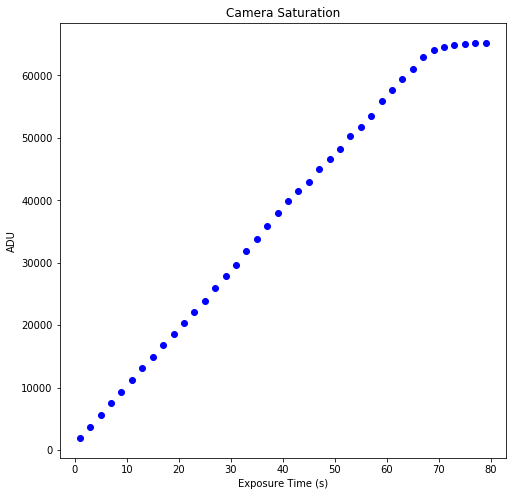

In [188]:
plt.figure(num=3, figsize=(8, 8))
plt.plot(exposures_2, means_2, 'bo')
plt.title('Camera Saturation')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.savefig('Dataset 2')

In [189]:
good_exposure = (exposures_2 < 65)
linear_fit = np.polyfit(exposures_2[good_exposure], means_2[good_exposure], 1)
linear_fit

array([930.63910176, 971.87552983])

In [190]:
def line_fit_2(x):
    return linear_fit[0] * exposures_2 + linear_fit[1]

In [191]:
y_fit_2 = line_fit_2(exposures_2)

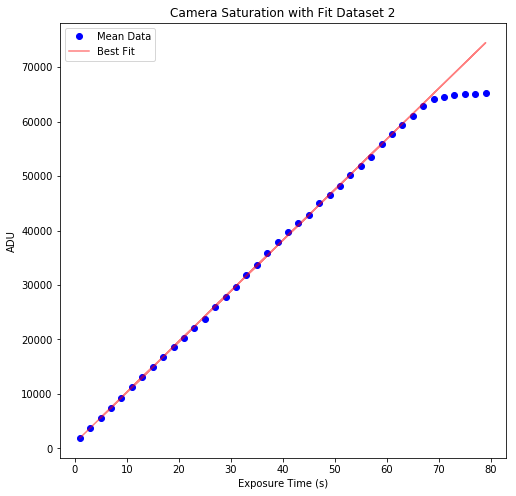

In [192]:
plt.figure(num=4, figsize=(8, 8))
plt.plot(exposures_2, means_2, 'bo', label='Mean Data')
plt.plot(exposures_2, y_fit_2, 'r-', alpha=.5, label='Best Fit')
plt.title('Camera Saturation with Fit Dataset 2')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU')
plt.legend()
plt.savefig('Linear Fit Dataset 2')

In [193]:
y_diff_2 = (y_fit_2 - means_2) / means_2 * 100

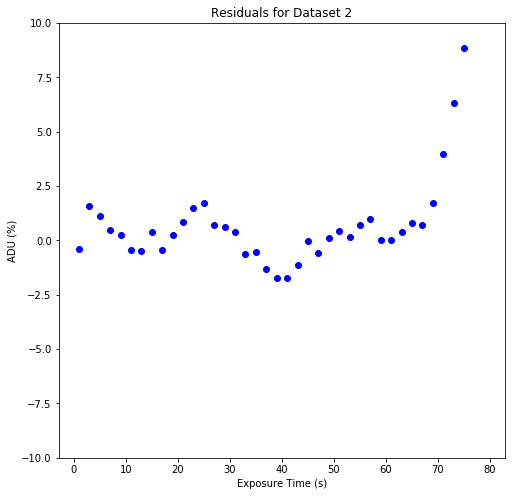

In [194]:
plt.figure(num=5, figsize=(8, 8))
plt.plot(exposures_2, y_diff_2, 'bo')
plt.ylim(-10, 10)
plt.title('Residuals for Dataset 2')
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU (%)')
plt.savefig('Residuals (Exposure) for Dataset 2')

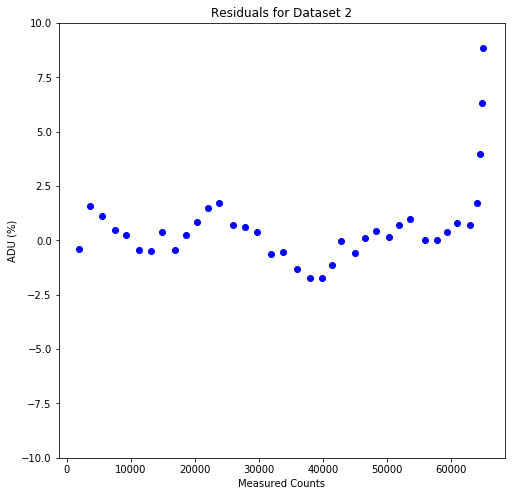

In [195]:
plt.figure(figsize=(8, 8))
plt.plot(means_2, y_diff_2, 'bo')
plt.title('Residuals for Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('ADU (%)')
plt.ylim(-10, 10)
plt.savefig('Use this one, idiot')

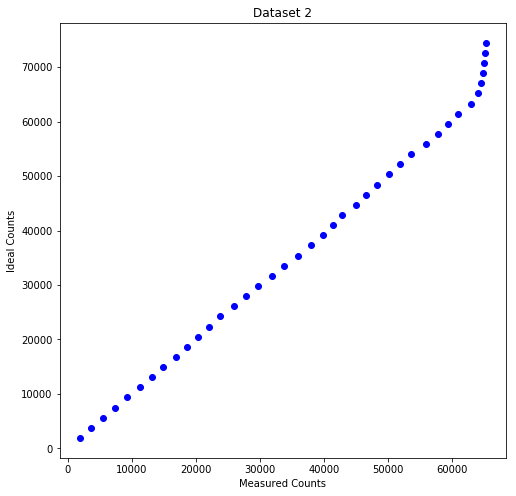

In [196]:
plt.figure(num=6, figsize=(8, 8))
plt.plot(means_2, y_fit_2, 'bo')
plt.title('Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.savefig('Ideal Counts vs Measured Counts Dataset 2')

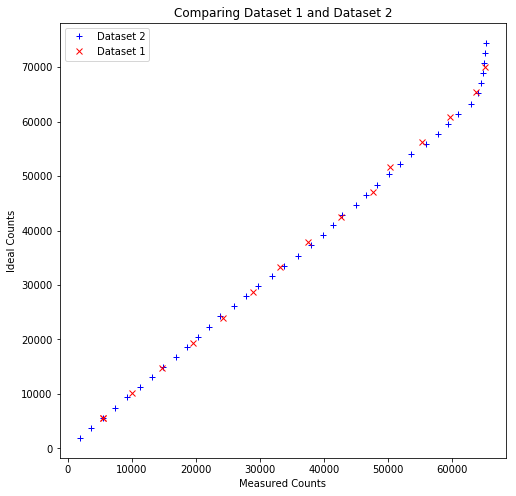

In [197]:
plt.figure(num=7, figsize=(8, 8))
plt.plot(means_2, y_fit_2, 'b+', label='Dataset 2')
plt.plot(means, y_fit, 'rx', label='Dataset 1')
plt.title('Comparing Dataset 1 and Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('Ideal Counts')
plt.legend()
plt.savefig('Comparing Dataset 1 and Dataset 2', bbox_inches='tight')

In [198]:
#Dataset 3

In [199]:
data_directory_3 = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-05-29'
im_collection_3 = ImageFileCollection(data_directory_3)
im_collection_3.summary

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,sbstdver,swcreate,swserial,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,cstretch,cblack,cwhite,pedestal,swowner,jd-obs,hjd-obs,bjd-obs,objctaz,azimuth,objctalt,altitude,objctha,ha,readmode,date,time-obs,ut,timesys,radecsys,airmass,st,lat-obs,long-obs,alt-obs,observat,ra,objctra,dec,objctdec,history
str33,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,str1,str11,float64,float64,float64,str21,str34,str32,float64,float64,str4,str14,str14,str20,str1,str1,str6,int32,int32,int32,str10,float64,float64,float64,float64,float64,float64,float64,str11,str11,str10,str8,str8,str8,str3,str3,float64,str11,float64,float64,float64,str5,str11,str11,str11,str11,str59
dome-S003-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-29T21:31:29,1.0,1.0,-20.0,-20.041362000000003,9.0,9.0,1,1,0,0,Monochrome,R,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458268.396863426,2458268.3946961346,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,6093,7031,0,Matt Craig,2458268.3968634,2458268.3976639,2458268.3984678,277.4238,277.4238,46.5377,46.5377,02 52 53.17,02 52 53.17,Monochrome,29/05/18,21:31:29,21:31:29,UTC,FK5,1.37290562356,14 00 55.17,0.0,-0.0,0.0,feder,11 08 02.00,11 08 02.00,+05 05 56.8,+05 05 56.8,File was processed by PinPoint 6.1.3 at 2018-05-29T21:31:53
done-S002-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-29T21:43:10,1.0,1.0,-20.0,-20.0350755,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458268.404976852,2458268.4028102956,done,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4022,4613,0,Matt Craig,2458268.4049769,2458268.4060336,2458268.4068375,277.4048,277.4048,46.3897,46.3897,02 53 28.97,02 53 28.97,Monochrome,29/05/18,21:43:10,21:43:10,UTC,FK5,1.37613353087,14 12 38.09,0.0,-0.0,0.0,feder,11 19 09.11,11 19 09.11,+05 06 00.0,+05 06 00.0,File was processed by PinPoint 6.1.3 at 2018-05-29T21:43:34
done-S002-R001-C001-r_dupe-1.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-29T21:43:46,2.0,2.0,-20.0,-20.03193225,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458268.4053935185,2458268.4032327873,done,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,7146,8209,0,Matt Craig,2458268.4053935,2458268.4064502,2458268.4072542,277.3845,277.3845,46.2405,46.2405,02 54 05.07,02 54 05.07,Monochrome,29/05/18,21:43:46,21:43:46,UTC,FK5,1.37962446638,14 13 14.19,0.0,-0.0,0.0,feder,11 19 09.11,11 19 09.11,+05 06 00.0,+05 06 00.0,File was processed by PinPoint 6.1.3 at 2018-05-29T21:44:11
done-S002-R001-C001-r_dupe-10.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-29T21:49:57,11.0,11.0,-20.0,-20.0476485,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458268.4096875,2458268.407579246,done,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,34860,40044,0,Matt Craig,2458268.4096875,2458268.4107438,2458268.4115477,277.1847,277.1847,44.703,44.703,03 00 17.09,03 00 17.09,Monochrome,29/05/18,21:49:57,21:49:57,UTC,FK5,1.41710658876,14 19 26.20,0.0,-0.0,0.0,feder,11 19 09.11,11 19 09.11,+05 06 00.0,+05 06 00.0,File was processed by PinPoint 6.1.3 at 2018-05-29T21:50:31
done-S002-R001-C001-r_dupe-11.fts,True,16,2,4109,4096,1.0,32768.0,2018-05-29T21:50:43,12.0,12.0,-20.0,-20.0350755,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458268.4102199073,2458268.4081174894,done,ACP->Simulator,Apog

In [200]:
exposures_3 = []
means_3 = []

for image in im_collection_3.hdus(imagetyp='LIGHT FRAME'):
    exposures_3.append(image.header['EXPOSURE'])
    means_3.append(np.mean(image.data))

exposures_3 = np.array(exposures_3)
means_3 = np.array(means_3)

In [201]:
print('Exposure times:    ', exposures_3)
print()
print('ADU:    ', means_3)

Exposure times:     [ 1.  1.  2. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.  3. 21. 22. 23. 24.
 25. 26. 27. 28. 29. 30.  4. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.  5.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.  6. 51. 52. 53. 54. 55. 56. 57.
 58. 59. 60.  7. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.  8. 71. 72. 73.
 74. 75. 76. 77. 78. 79. 80.  9. 81. 82. 83. 84. 85. 86. 87. 10.]

ADU:     [ 5538.54498581  3682.21402149  6457.68335294 31099.18235831
 34718.39091733 37484.05887972 39899.91027888 43628.59091009
 46109.44852132 48369.31401535 51994.29407692 54577.36373471
 56102.33994909  8936.94584225 57743.16903729 58931.89926249
 59998.71915439 60934.91401526 61592.1041897  62142.14789996
 62422.56097538 62863.19162567 63186.20010227 63436.33734471
 11585.49018696 63655.69969301 63930.35088646 64101.0352771
 64240.57573517 64233.29929519 64435.17542036 64606.43397383
 64701.63554077 64786.75390179 64856.23772446 14318.04869123
 64899.71878476 64960.38834128 65012.16460372 65062.47852947
 65

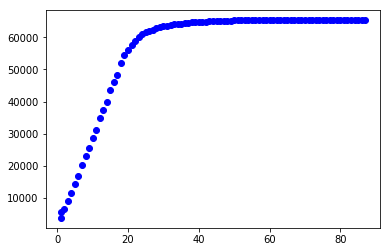

In [202]:
plt.plot(exposures_3, means_3, 'bo')
#plt.xlim(0, 40)

In [203]:
good_exposure = ((exposures_3 > 2) & (exposures_3 < 16))
linear_fit = np.polyfit(exposures_3[good_exposure], means_3[good_exposure], 1)
linear_fit

array([2877.46545331,  -63.24743122])

In [204]:
def line_fit_3(x):
    return linear_fit[0] * exposures_3 + linear_fit[1]

In [205]:
y_fit_3 = line_fit_3(exposures_3)

(0, 30)

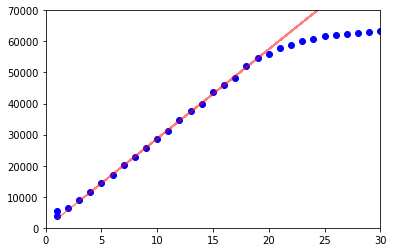

In [206]:
plt.plot(exposures_3, means_3, 'bo')
plt.plot(exposures_3, y_fit_3, 'r-', alpha=.5)
plt.ylim(0, 70000)
plt.xlim(0, 30)

In [207]:
y_diff_3 = y_fit_3 - means_3
y_diff_3 = (y_fit_3 - means_3) / means_3 * 100

(-10, 10)

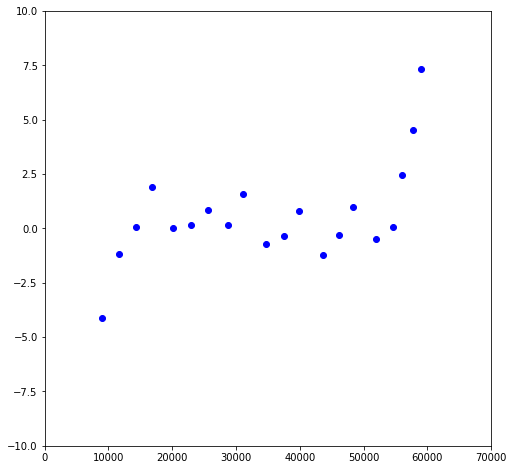

In [208]:
plt.figure(figsize=(8, 8))
plt.plot(means_3, y_diff_3, 'bo')
plt.xlim(0, 70000)
plt.ylim(-10, 10)

# Dataset 4

In [209]:
data_directory_4 = r'C:\Users\Adam Kline\Documents\Astronomy Research\Linearity of Camera\2018-06-01'
im_collection_4 = ImageFileCollection(data_directory_4)
im_collection_4.sort('exposure')
im_collection_4.summary


file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,sbstdver,swcreate,swserial,jd,jd-helio,object,telescop,instrume,observer,notes,flipstat,cstretch,cblack,cwhite,pedestal,swowner,jd-obs,hjd-obs,bjd-obs,objctaz,azimuth,objctalt,altitude,objctha,ha,readmode,date,time-obs,ut,timesys,radecsys,airmass,st,lat-obs,long-obs,alt-obs,observat,ra,objctra,dec,objctdec,history
str34,bool,int32,int32,int32,int32,float64,float64,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,str1,str11,float64,float64,float64,str21,str34,str32,float64,float64,str4,str14,str14,str20,str1,str1,str6,int32,int32,int32,str10,float64,float64,float64,float64,float64,float64,float64,str12,str12,str10,str8,str8,str8,str3,str3,float64,str11,float64,float64,float64,str5,str11,str11,str11,str11,str59
dome-S003-R001-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-01T19:36:52,1.0,1.0,-20.0,-20.000499750000003,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.3172685187,2458271.315368362,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4015,4435,0,Matt Craig,2458271.3172685,2458271.3150628,2458271.3158668,4.5921,4.5921,89.9043,89.9043,-11 41 37.90,-11 41 37.90,Monochrome,01/06/18,19:36:52,19:36:52,UTC,FK5,1.0,12 17 49.01,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-01T19:37:16
dome-S003-R004-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T04:08:56,1.0,1.0,-20.0,-19.98164025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.6728703706,2458271.67100307,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4055,4478,0,Matt Craig,2458271.6728704,2458271.6706601,2458271.6714641,132.9592,132.9592,89.9043,89.9043,-03 08 09.78,-03 08 09.78,Monochrome,02/06/18,04:08:56,04:08:56,UTC,FK5,1.0,20 51 17.13,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T04:09:20
dome-S003-R005-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T06:59:37,1.0,1.0,-20.0,-20.003643,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.791400463,2458271.7895441293,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4139,4572,0,Matt Craig,2458271.7914005,2458271.7891887,2458271.7899927,175.7469,175.7469,89.9043,89.9043,-00 17 00.74,-00 17 00.74,Monochrome,02/06/18,06:59:37,06:59:37,UTC,FK5,1.0,23 42 26.17,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T07:00:01
dome-S003-R003-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-02T01:18:13,1.0,1.0,-20.0,-19.98164025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.55431713,2458271.5524388677,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4227,4673,0,Matt Craig,2458271.5543171,2458271.5521083,2458271.5529124,90.1632,90.1632,89.9043,89.9043,-05 59 20.83,-05 59 20.83,Monochrome,02/06/18,01:18:13,01:18:13,UTC,FK5,1.0,18 00 06.08,90.0,-0.0,0.0,feder,23 59 26.91,23 59 26.91,+89 54 15.6,+89 54 15.6,File was processed by PinPoint 6.1.3 at 2018-06-02T01:18:36
dome-S003-R002-C001-r.fts,True,16,2,4109,4096,1.0,32768.0,2018-06-01T22:27:42,1.0,1.0,-20.0,-20.0225025,9.0,9.0,1,1,0,0,Monochrome,r,Light Frame,0.0,0.0,0.0,SBFITSEXT Version 1.0,MaxIm DL Version 6.17 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,2458271.4359027776,2458271.4340135744,dome,ACP->Simulator,Apogee USB/Net,Observatory Operator,,,Medium,4152,4589,0,Matt Cra

In [210]:
exposures_4 = []
means_4 = []

for image in im_collection_4.hdus(imagetyp='LIGHT FRAME'):
    exposures_4.append(image.header['EXPOSURE'])
    means_4.append(np.mean(image.data))

exposures_4 = np.array(exposures_4)
means_4 = np.array(means_4)

In [211]:
print('Exposure times:    ', exposures_4)
print()
print('ADU:    ', means_4)

Exposure times:     [ 1.   1.   1.   1.   1.   1.5  1.5  1.5  1.5  1.5  2.   2.   2.   2.
  2.   2.5  2.5  2.5  2.5  2.5  3.   3.   3.   3.   3.   3.5  3.5  3.5
  3.5  3.5  4.   4.   4.   4.   4.   4.5  4.5  4.5  4.5  4.5  5.   5.
  5.   5.   5.   5.5  5.5  5.5  5.5  5.5  6.   6.   6.   6.   6.   6.5
  6.5  6.5  6.5  6.5  7.   7.   7.   7.   7.   7.5  7.5  7.5  7.5  7.5
  8.   8.   8.   8.   8.   8.5  8.5  8.5  8.5  8.5  9.   9.   9.   9.
  9.   9.5  9.5  9.5  9.5  9.5 10.  10.  10.  10.  10.  10.5 10.5 10.5
 10.5 10.5 11.  11.  11.  11.  11.  11.5 11.5 11.5 11.5 11.5 12.  12.
 12.  12.  12.  12.5 12.5 12.5 12.5 12.5 13.  13.  13.  13.  13.  13.5
 13.5 13.5 13.5 13.5 14.  14.  14.  14.  14.  14.5 14.5 14.5 14.5 14.5
 15.  15.  15.  15.  15.  15.5 15.5 15.5 15.5 15.5 16.  16.  16.  16.
 16.  16.5 16.5 16.5 16.5 16.5 17.  17.  17.  17.  17.  17.5 17.5 17.5
 17.5 17.5 18.  18.  18.  18.  18.  18.5 18.5 18.5 18.5 18.5 19.  19.
 19.  19.  19.  19.5 19.5 19.5 19.5 19.5 20.  20.  20.  20.  20

(0, 40)

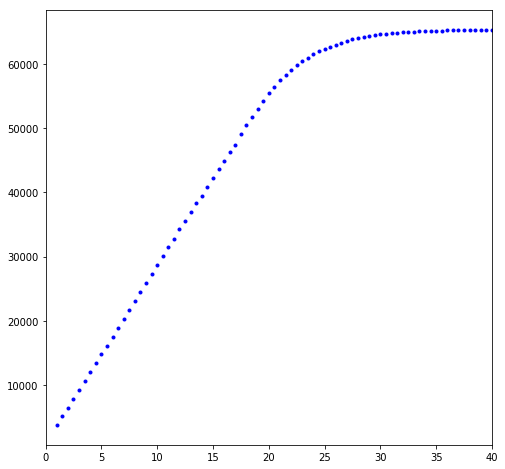

In [212]:
set_one_data = means_4[0::5]
set_two_data = means_4[1::5]
set_three_data = means_4[2::5]
set_four_data = means_4[3::5]
set_five_data = means_4[4::5]
average_data = (set_one_data + set_two_data + set_three_data + set_four_data + set_five_data) / 5

set_one_exp = exposures_4[0::5]
set_two_exp = exposures_4[1::5]
set_three_exp = exposures_4[2::5]
set_four_exp = exposures_4[3::5]
set_five_exp = exposures_4[4::5]
average_exp = (set_one_exp + set_two_exp + set_three_exp + set_four_exp + set_five_exp) / 5

average_data = np.sort(average_data)
average_exp = np.sort(average_exp)
#np.sort?
#exposures_4.shape
#print(average_data)
#print(average_exp)
plt.figure(figsize=(8, 8))
plt.plot(average_exp, average_data, 'b.')
plt.xlim(0, 40)

In [213]:
good_exposure = (average_exp < 10)
linear_fit = np.polyfit(average_exp[good_exposure], average_data[good_exposure], 1)
linear_fit

array([2768.61643464,  948.65131756])

In [214]:
def line_fit_4(x):
    return linear_fit[0] * average_exp + linear_fit[1]

In [215]:
y_fit_4 = line_fit_4(average_exp)

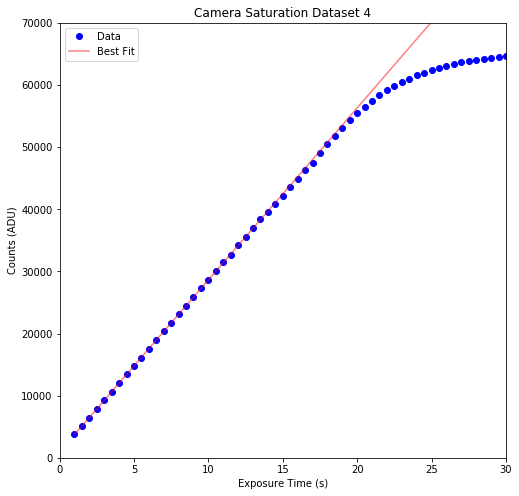

In [216]:
plt.figure(figsize=(8, 8))
plt.plot(average_exp, average_data, 'bo', label='Data')
plt.plot(average_exp, y_fit_4, 'r-', alpha=.5, label='Best Fit')
plt.xlabel('Exposure Time (s)')
plt.ylabel('Counts (ADU)')
plt.title('Camera Saturation Dataset 4')
plt.legend()
plt.ylim(0, 70000)
plt.xlim(0, 30)
plt.savefig('linear fit dataset 4')

In [217]:
y_diff_4 = y_fit_4 - average_data
y_diff_4 = (y_fit_4 - average_data) / average_data * 100

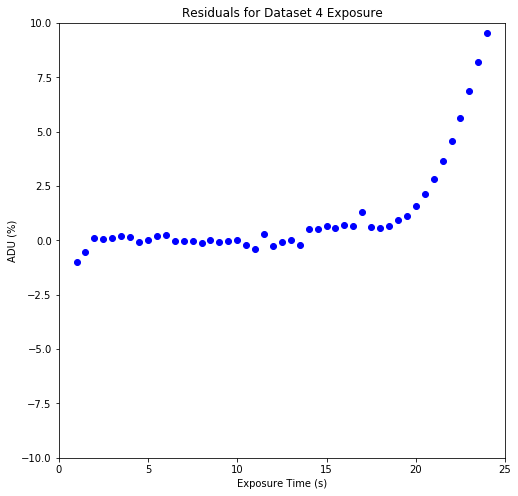

In [218]:
plt.figure(figsize=(8, 8))
plt.plot(average_exp, y_diff_4, 'bo')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('Exposure Time (s)')
plt.ylabel('ADU (%)')
plt.title('Residuals for Dataset 4 Exposure')
plt.savefig('residuals dataset 4 exp')

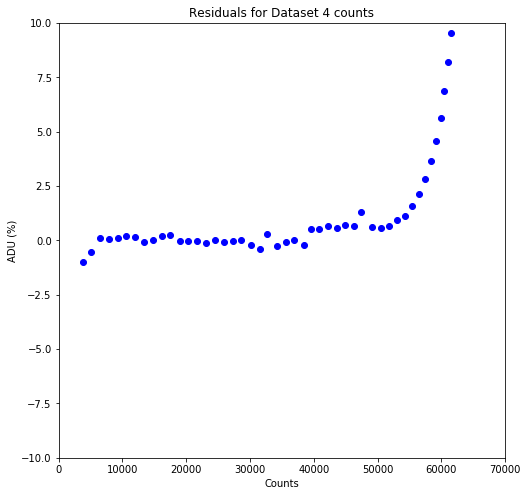

In [219]:
plt.figure(figsize=(8, 8))
plt.plot(average_data, y_diff_4, 'bo')
plt.xlim(0, 70000)
plt.ylim(-10, 10)
plt.xlabel('Counts')
plt.ylabel('ADU (%)')
plt.title('Residuals for Dataset 4 counts')
plt.savefig('residuals dataset 4 counts')

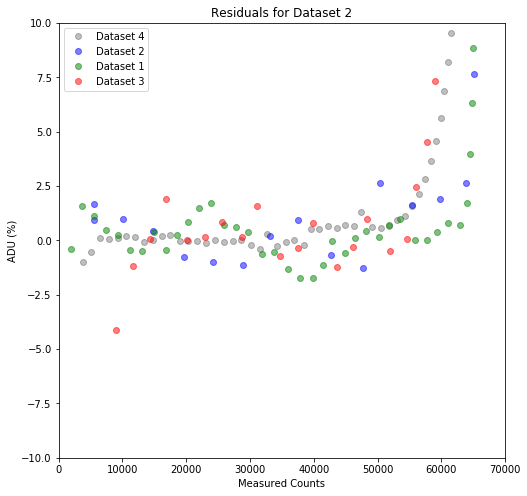

In [243]:
plt.figure(figsize=(8, 8))
plt.plot(average_data, y_diff_4, 'ko', label='Dataset 4', alpha=.25)
plt.plot(means, y_diff, 'bo', label='Dataset 2', alpha=.5)
plt.plot(means_2, y_diff_2, 'go', label='Dataset 1', alpha=.5)
plt.plot(means_3, y_diff_3, 'ro', label='Dataset 3', alpha=.5)
plt.xlim(0, 70000)
plt.title('Residuals for Dataset 2')
plt.xlabel('Measured Counts')
plt.ylabel('ADU (%)')
plt.ylim(-10, 10)
plt.legend()